### Importing useful libraries 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in
import numpy as np   # linear algebra
import matplotlib.pyplot as plt # data visualization
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

### Loading the dataset 
#### For implementation we will be using house prediction dataset . The dataset can be found [here](https://github.com/vrinda01go/Hellofoss/blob/main/Room_price_data.csv)

In [2]:
df = pd.read_csv("Hostel_Linear-Dataset.csv")  #import text file 


In [3]:
df.head()

,Price,Hostel No.,Occupancy,Room Size,Floor
0,2540.0,3,1,686,8
1,2900.0,3,2,966,5
2,NaN,3,1,788,8
3,2362.0,3,2,924,2
4,NaN,3,2,1098,5


# Visualizing and Cleaning the data

We will now be removing the nan values and identical values from the dataset

For seeing if there are nan values in the dataset we will use the isna() function and then to remove them we will use the dropna() function. We will need to set additional parameters like rows and columns in the dropna function depending on the number of nan values present for each column

Using the sum() function with isna() function we can get to know the number of missing values in each column

In [4]:
print(df.isna().sum())

#fill

Price         1531
Hostel No.       0
Occupancy        0
Room Size        0
Floor            0
dtype: int64


After this we will proceed to remove the nan values 

Since there are not many nan values in the column 'Price' as compared to the number of rows we will remove the rows which have nan values. 

Reseting the index after removing the nan values and dropping the old index will also be important

In [5]:
df.dropna(axis=0,inplace=True)      #axis=0 implies rows to be removed if any empty value present in that row.
df.reset_index(drop=True,inplace=True)
df.head()


,Price,Hostel No.,Occupancy,Room Size,Floor
0,2540.0,3,1,686,8
1,2900.0,3,2,966,5
2,2362.0,3,2,924,2
3,1432.0,2,1,706,3
4,1702.0,2,2,1038,3


Now we can use the drop_duplicate function to remove the duplicate values

This function has a parameter calle 'keep' where we specifiy to drop and which value to keep

For this excercise we will keep the first values and drop the rest of the duplicates

In [6]:
df.drop_duplicates(inplace=True)
df.info()
df.nunique() # We see that price and room size is numeric feature and others are categorical. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5005 entries, 0 to 5006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       5005 non-null   float64
 1   Hostel No.  5005 non-null   int64  
 2   Occupancy   5005 non-null   int64  
 3   Room Size   5005 non-null   int64  
 4   Floor       5005 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 234.6 KB


Price         1320
Hostel No.       3
Occupancy        4
Room Size      974
Floor            8
dtype: int64

For visualizing the data we will first start with looking at the distribution of different columns to see if there are enough number for each category in every column and dropping them if the data is biased for one category more than the other

In [7]:
df.describe()

,Price,Hostel No.,Occupancy,Room Size,Floor
count,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000
mean,1905.046766,2.071528,2.050949,984.927273,3.530070
std,1061.569136,0.790429,0.801927,234.960860,2.053381
min,370.000000,1.000000,1.000000,500.000000,1.000000
25%,1202.000000,1.000000,1.000000,790.000000,2.000000
50%,1620.000000,2.000000,2.000000,996.000000,3.000000
75%,2354.000000,3.000000,3.000000,1143.000000,5.000000
max,12020.000000,3.000000,4.000000,1748.000000,8.000000


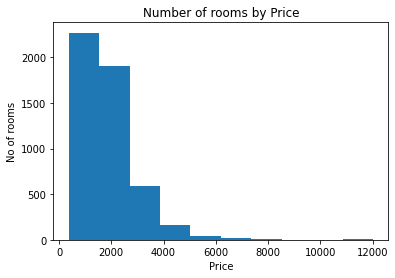

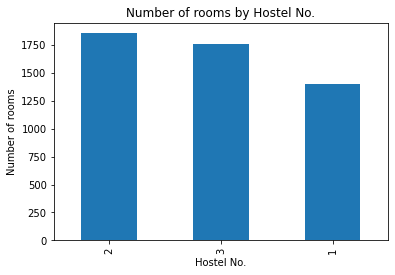

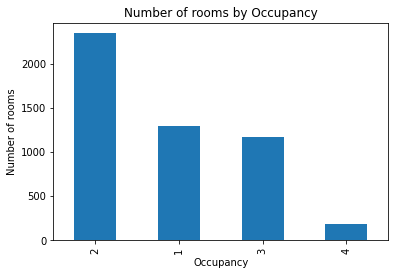

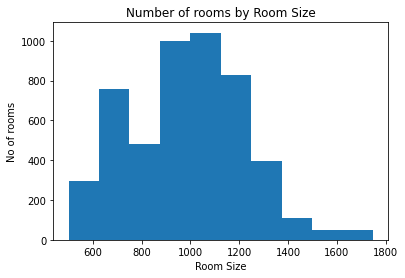

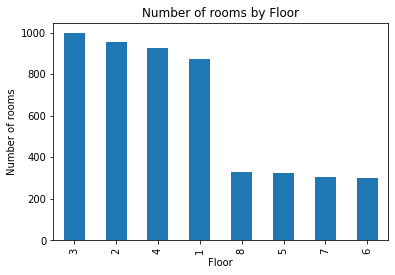

In [9]:
columns = df.columns
for column in columns:
    if column== "Price" or column=="Room Size":
        plt.hist(df[column])
        plt.xlabel(column)
        plt.ylabel("No of rooms")
        plt.title('Number of rooms by '+ column)
        continue
    fig = plt.figure()
    ax = fig.gca()
    counts = df[column].value_counts()
    counts.plot.bar(ax = ax)
    ax.set_title('Number of rooms by '+ column)
    ax.set_xlabel(column)
    ax.set_ylabel("Number of rooms")
    plt.show()
    
    #fig=plt.figure()  
    #ax=fig.gca()
    #a=df.groupby(column)
    #a.plot.bar(ax=ax)
    #plt.bar(a,a.count())
    #count.plot.bar(x=column, y="No of rooms")
    #plt.bar(count)
             
    

We can clearly notice that for the Occupancy column the (occupancy) = 4 has a really low set of data points as compared to others. Hence we can proceed in dropping those rows where the occupancy is 4

In [10]:
df=df[df["Occupancy"]!=4]
df.reset_index(drop=True,inplace=True)

In [11]:
print(df.head())
print(df.info())

    Price  Hostel No.  Occupancy  Room Size  Floor
0  2540.0           3          1        686      8
1  2900.0           3          2        966      5
2  2362.0           3          2        924      2
3  1432.0           2          1        706      3
4  1702.0           2          2       1038      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       4815 non-null   float64
 1   Hostel No.  4815 non-null   int64  
 2   Occupancy   4815 non-null   int64  
 3   Room Size   4815 non-null   int64  
 4   Floor       4815 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 188.2 KB
None


We will now write the columns between categorical and numerical

categorical = Hostel No, occupancy, floor

Numerical = price, occupancy, roomsize, floor, hostel No.

Remember that we can treat Hostel Number and occupancy as numerical or categorical. For this notebook we will treat them as categorical for data visualization and numerical for the regression

We will also plot the scatter plots and the correlation map to analyse the relation ships between different numerical columns

In [12]:
categorical = ['Hostel No.', 'Occupancy', 'Floor']
numerical = [ 'Price', 'Room Size']

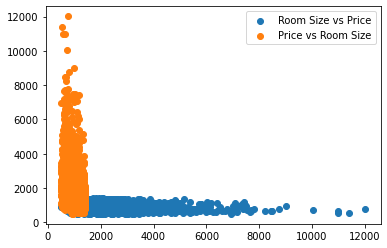

In [13]:
for column1 in numerical:
    for column2 in numerical:
    
        if(column1 != column2):
            plt.scatter(df[column1],df[column2],label=f"{column2} vs {column1}")   #y vs x
            plt.legend()
            #fill

We can notice that there are no linear relation present between the numerical columns. Hence no need to drop anything

Now we will plot box plots of categorical and numerical columns to get more information about the number of outliers and the distrubtion.

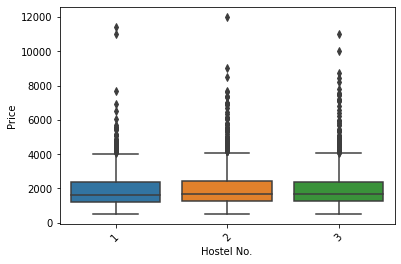

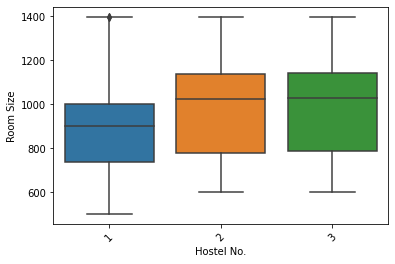

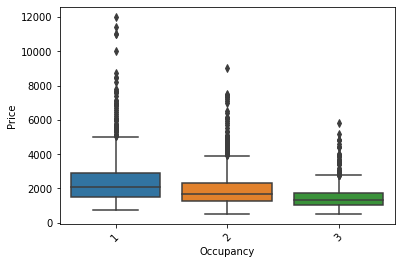

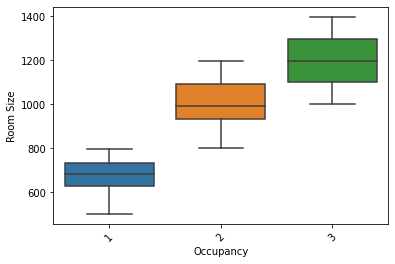

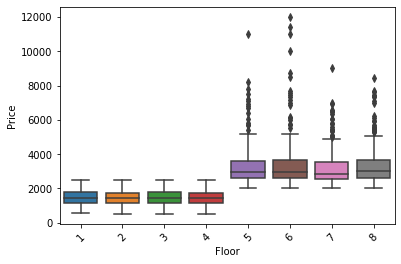

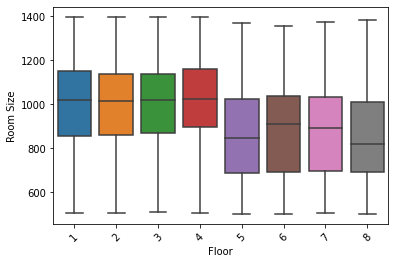

In [14]:
for c in categorical:              # categorical in x, numerial in y
    for n in numerical:
        sns.boxplot(x=c,y=n,data=df)
        plt.xlabel(c)
        plt.ylabel(n)
        plt.xticks(rotation=45)
        plt.show()
                  
        # we can use the boxplot function of pandas (refer to the documentation)

Now that we have analysed our data we can proceed to normalixing our data and regression

### Importing useful libraries 


In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in
import numpy as np   # linear algebra
import matplotlib.pyplot as plt # data visualization
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)


### Loading the dataset 
#### For implementation we will be using house prediction dataset . The dataset can be found [here](https://github.com/vrinda01go/Hellofoss/blob/main/Insti_data.csv)

In [16]:
df['Room Size']=df['Room Size']/max(df['Room Size'])
data = np.array(df, dtype=float)

data
x=df.iloc[:,1:]
x['4']=1
x_data=np.array(x)
y_data=np.array(df.iloc[:,0])


#### Since our dataset has four features i.e Hostel No. , Occupancy, Room Size and Floor ,our hypothesis function becomes
### hθ(x) = θ0 + θ1x1 + θ2x2 +θ3x3 + θ4x4
#### where x1 ,x2,x3 and x4 are the two features (i.e. size of house and number of rooms)

### So Your task is to define hypothesis function having 4 features and a corresponding cost function 

In [17]:
def hypotheses_fnc(theta,X):
    return X.dot(theta)       # theta is a 1x5 vector and X is mx5 vector where m is the number of data points
#returns mx1
# define and complete hypothesis function 

In [18]:
def cost(theta,X,Y):         # Y is mx1 vector
    prediction= hypotheses_fnc(theta,X)
    error=Y-prediction
    m=len(Y)
    return (1/(2*m))*np.sum(np.square(error))
# define and complete cost function

### Gradient Descent 
#### So we have our hypothesis function and we have a way of measuring how well it fits into the data. Now we need to estimate the parameters in the hypothesis function. That's where gradient descent comes in.
### Your next task is to define gradient descent function having some specific value of learning rate and number of epochs.
#### Note that learning rate should be neither very high nor very low .Why?
#### Check out exact reason [here](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10)



In [33]:
#define and complete Gradient Descent function 
def grad_fnc(theta,X,Y,lrate,iter_max):
    m=len(Y)
    costs=[]
    for i in range(iter_max):
        pred=hypotheses_fnc(theta,X)
        theta-=(1/m)*lrate*(X.T.dot((pred-Y)))
        costs.append(cost(theta,X,Y))
    plt.plot(costs)
    plt.title("Cost versus number of epochs")
    plt.xlabel("Number of Epoch")
    plt.ylabel("Cost Function(MSE)")
    plt.show()
    return theta    

### Now we want to visualize how our cost function varies with number of epochs .So your next task is to plot graph of updated costs vs number of epochs 

#### After plotting above graph you will notice that your cost function decreases with epochs.
#### Perfect! This is all what we wanted to seek by doing linear regression. 

#### Now it's time to test our model on some test data. 

#### For this you will define a test function that will take as input Hostel No. , Occupancy, Room Size , Floor and the final theta vector that was returned by our linear regression model and will give us the price of the house. Compute it for any set of features given and final value of theta as given by gradient descent function

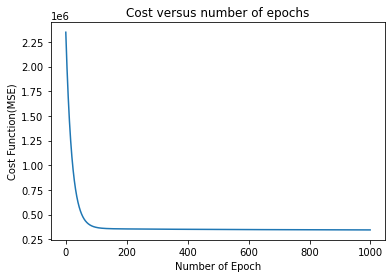

[183.40844498  43.65402416  41.35080181 365.59865548 108.20474766]


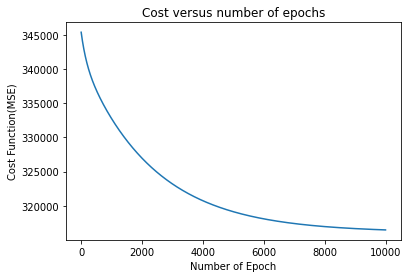

[ 104.5294653  -268.59129408  174.94025041  314.52020843 1011.31023649]


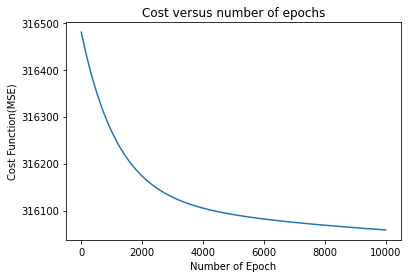

[  85.93250153 -285.65738104  122.1144638   307.33938916 1150.67925492]


In [42]:
# define and complete test function that will take required inputs .This function should return price of Room 
theta=np.zeros(5)
ideal_theta1=grad_fnc(theta,x_data,y_data,0.001,1000)
print(ideal_theta1)
ideal_theta2=grad_fnc(theta,x_data,y_data,0.005,10000)
print(ideal_theta2)
ideal_theta3=grad_fnc(theta,x_data,y_data,0.01,10000)
print(ideal_theta3)


#### Now since we have defined all required functions , we can call functions one by one and get our final results .
#### Your final task is to use all functions defined above and predict the price of room for some input combinations to check how well your model works.

#### You can try playing with different values of alpha and epochs and see which combination gives most accurate results but do lookout for overfitting 


<b> Either of theta1 or theta 3 can be used as the error is min in both. Considering theta1</b>

In [47]:
def prediction(X,Y,theta):
    df=pd.DataFrame({"The predicted values":hypotheses_fnc(theta,X),"The actual values":Y})
    print(df)
prediction(x_data,y_data,ideal_theta3)    

      The predicted values  The actual values
0              3641.413350             2540.0
1              2458.178151             2900.0
2              1532.493931             2362.0
3              2020.529642             1432.0
4              1763.851533             1702.0
...                    ...                ...
4810           2017.736459             1624.0
4811           2013.546684             1470.0
4812           1846.990852             1020.0
4813           1140.444058             2400.0
4814           1543.753950              950.0

[4815 rows x 2 columns]
